In [1]:
# Library Imports 

import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split

% matplotlib inline

## Business Data

In [2]:
business = pd.read_json('./Data/business.json', lines =  True)
#business = pd.read_pickle('business.pkl')

print(business.shape)


# Only open businesses & with categories
business = business[business.is_open == 1]
business.drop(columns = ['address','is_open', 'latitude', 'longitude'], inplace = True)
business = business[business.categories.apply(len) != 0]

business.head()

(174567, 15)


,attributes,business_id,categories,city,hours,name,neighborhood,postal_code,review_count,stars,state
0,"{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",Dental by Design,,85044,22,4.0,AZ
1,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",Stephen Szabo Salon,,15317,11,3.0,PA
2,{},KQPW8lFf1y5BT2MxiSZ3QA,"[Departments of Motor Vehicles, Public Service...",Phoenix,{},Western Motor Vehicle,,85017,18,1.5,AZ
4,"{'Alcohol': 'full_bar', 'HasTV': True, 'NoiseL...",PfOCPjBrlQAnz__NXj9h_w,"[American (New), Nightlife, Bars, Sandwiches, ...",Cuyahoga Falls,"{'Monday': '11:00-1:00', 'Tuesday': '11:00-1:0...",Brick House Tavern + Tap,,44221,116,3.5,OH
5,"{'GoodForMeal': {'dessert': False, 'latenight'...",o9eMRCWt5PkpLDE0gOPtcQ,"[Italian, Restaurants]",Stuttgart,"{'Monday': '18:00-0:00', 'Tuesday': '18:00-0:0...",Messina,,70567,5,4.0,BW


In [5]:
print('Size : ',business.shape)
display(business.info())

Size :  (146226, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146226 entries, 0 to 174566
Data columns (total 11 columns):
attributes      146226 non-null object
business_id     146226 non-null object
categories      146226 non-null object
city            146226 non-null object
hours           146226 non-null object
name            146226 non-null object
neighborhood    146226 non-null object
postal_code     146226 non-null object
review_count    146226 non-null int64
stars           146226 non-null float64
state           146226 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 13.4+ MB


None

## Review Data

In [6]:
# Takes a lot of time to read
review = pd.DataFrame()

df = pd.read_json('./Data/review.json',lines = True, chunksize= 1e5)

try:
   for df_chunk in df:
       review = pd.concat([review, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

review.drop(columns = ['cool','funny'], inplace = True)

print(review.shape)

review.head()

(5261669, 7)


,business_id,date,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,2016-05-28,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw
2,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,n6QzIUObkYshz4dz2QRJTw,5,Small unassuming place that changes their menu...,0,bv2nCi5Qv5vroFiqKGopiw
3,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,MV3CcKScW05u5LVfF6ok0g,5,Lester's is located in a beautiful neighborhoo...,0,bv2nCi5Qv5vroFiqKGopiw
4,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,IXvOzsEMYtiJI0CARmj77Q,4,Love coming here. Yes the place always needs t...,0,bv2nCi5Qv5vroFiqKGopiw


In [7]:
review.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'useful',
       'user_id'],
      dtype='object')

In [8]:
review.describe()

,stars,useful
count,5.261669e+06,5.261669e+06
mean,3.727740e+00,1.385085e+00
std,1.433593e+00,4.528727e+00
min,1.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00
75%,5.000000e+00,2.000000e+00
max,5.000000e+00,3.364000e+03


In [9]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261669 entries, 0 to 5261668
Data columns (total 7 columns):
business_id    object
date           datetime64[ns]
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 281.0+ MB


## Check-In Data

In [11]:
checkin = pd.read_json('./Data/checkin.json', lines = True)
#checkin = pd.read_pickle('checkin.pkl')
print(checkin.shape)
checkin.head()

(146350, 2)


,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."
2,tJRDll5yqpZwehenzE2cSg,"{'Monday': {'12:00': 1, '1:00': 1}, 'Friday': ..."
3,r1p7RAMzCV_6NPF0dNoR3g,"{'Thursday': {'23:00': 1}, 'Saturday': {'21:00..."
4,mDdqgfrvROGAumcQdZ3HIg,"{'Monday': {'12:00': 1, '21:00': 1}, 'Wednesda..."


## User Data

In [13]:
user = pd.read_json('./Data/user.json', lines = True)
#user = pd.read_pickle('user.pkl')

user_columns_to_remove = ['compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer',
       'cool', 'elite', 'fans', 'friends', 'funny',
       'useful', 'yelping_since']
user.drop(columns = user_columns_to_remove, inplace = True)

print(user.shape)
user.head()

(1326101, 4)


,average_stars,name,review_count,user_id
0,4.67,Johnny,8,oMy_rEb0UBEmMlu-zcxnoQ
1,3.70,Chris,10,JJ-aSuM4pCFPdkfoZ34q0Q
2,2.00,Tiffy,1,uUzsFQn_6cXDh6rPNGbIFA
3,4.67,Mark,6,mBneaEEH5EMyxaVyqS-72A
4,4.67,Evelyn,3,W5mJGs-dcDWRGEhAzUYtoA


In [14]:
user.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326101 entries, 0 to 1326100
Data columns (total 4 columns):
average_stars    1326101 non-null float64
name             1326101 non-null object
review_count     1326101 non-null int64
user_id          1326101 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 50.6+ MB


## Using only half the data

In [15]:
# train_test_split
business, _ = train_test_split(business, test_size = 0.5)
review, _ = train_test_split(review, test_size = 0.5)
user, _ = train_test_split(user, test_size = 0.5)

# Exploratory Data Analysis

## Distribution of Reviews

Text(0.5,0,'Number of reviews')

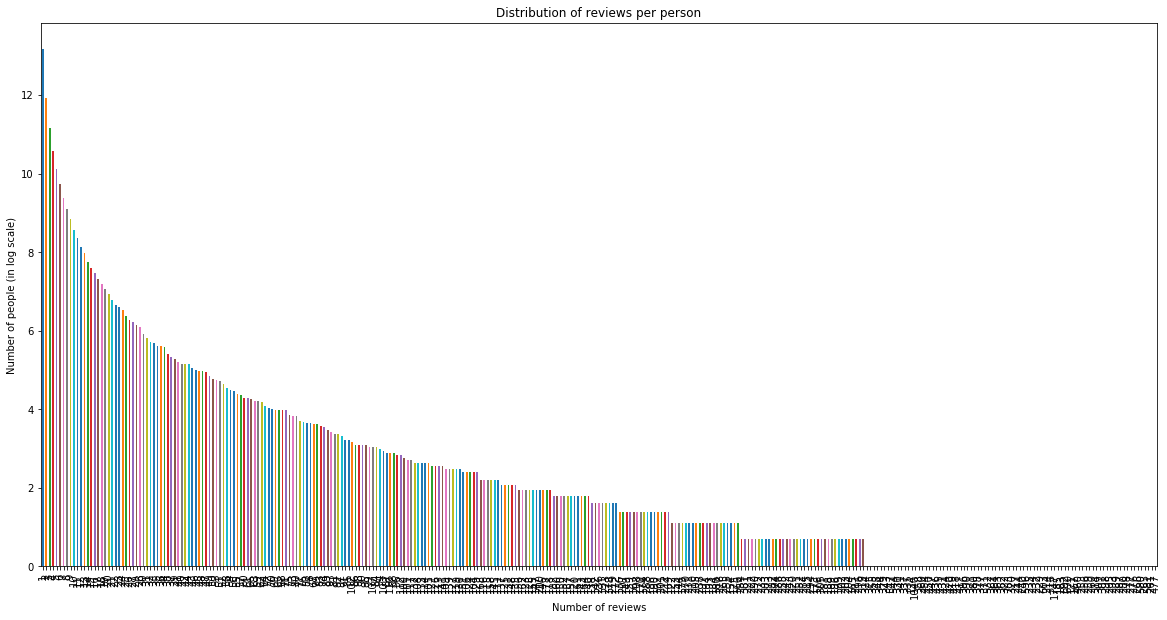

In [25]:
dist_reviews = review.user_id.value_counts().value_counts()

ax = np.log(dist_reviews).plot(kind = 'bar', title = 'Distribution of reviews per person', figsize = (20,10))
ax.set_ylabel("Number of people (in log scale)")
ax.set_xlabel("Number of reviews")

Text(0.5,0,'Number of reviews')

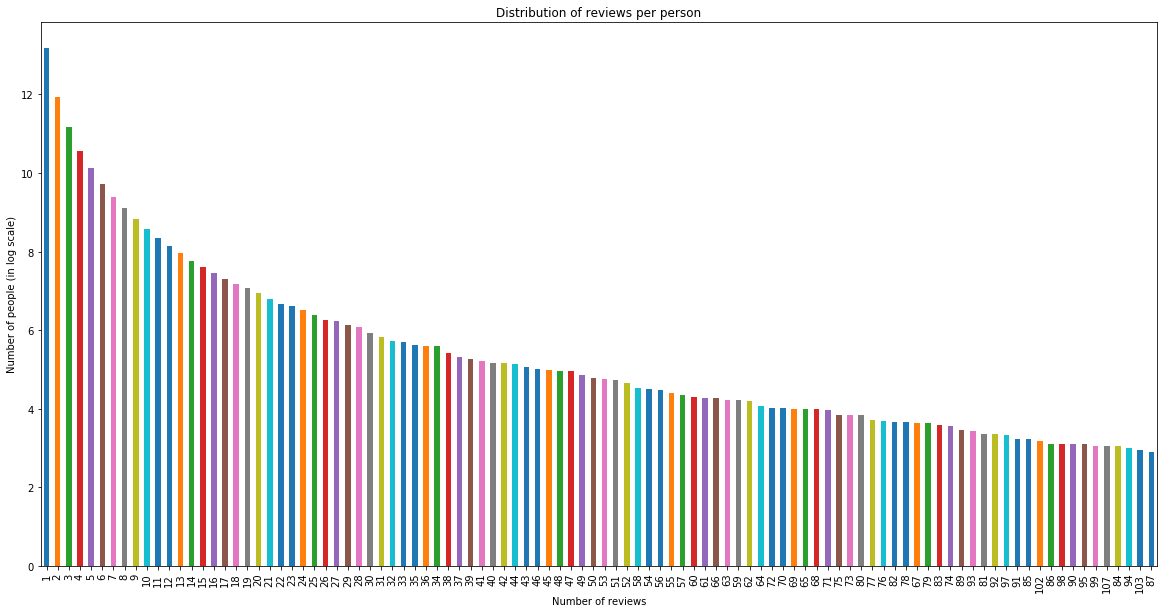

In [26]:
ax = np.log(dist_reviews[ :100]).plot(kind = 'bar', title = 'Distribution of reviews per person', figsize = (20,10))
ax.set_ylabel("Number of people (in log scale)")
ax.set_xlabel("Number of reviews")

## Person with the most reviews

In [27]:
max_rev_user_id = user.user_id[user.review_count == max(user.review_count)].values[0]
print('Name : %s' % (user.name[user.user_id == max_rev_user_id].values[0]))
print('Number of Reviews : %s' % (user.review_count[user.user_id == max_rev_user_id].values[0]))

person_most_reviews = review[review.user_id == max_rev_user_id]
print('First Review : %s' % min(person_most_reviews.date))
print('Latest Review : %s' % max(person_most_reviews.date))

Name : Kim
Number of Reviews : 9788
First Review : 2010-07-23 00:00:00
Latest Review : 2014-09-02 00:00:00


In [28]:
person_most_reviews

,business_id,date,review_id,stars,text,useful,user_id
4429788,FrBOZaE_8gESAO8ij6hJRQ,2010-07-23,9QlQBuE_IxKimLmhWQg51A,5,The company that started my love of cars and d...,3,P5bUL3Engv-2z6kKohB6qQ
4429784,FZgrmk2j2VXUVHRq1TfhrA,2014-09-02,vrGdtkDPTOzPjLH5s_8xZg,4,"Referred to me by a Frenchman, a French Canadi...",1,P5bUL3Engv-2z6kKohB6qQ
4429785,uAinKQxXlMz1DvnZaadEeQ,2013-11-01,yto19VIHuo_c8qHibermRA,4,Im waiting for Nairn's to make Haggis in biscu...,1,P5bUL3Engv-2z6kKohB6qQ


## Ratings

Text(0.5,0,'Rating of review')

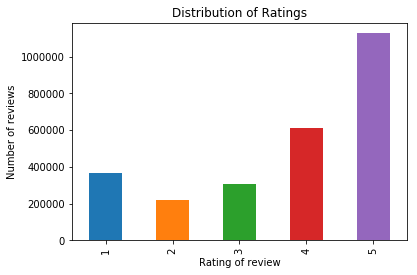

In [30]:
ax = review.stars.value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of Ratings')
ax.set_ylabel("Number of reviews")
ax.set_xlabel("Rating of review")

Text(0.5,0,'Average review rating')

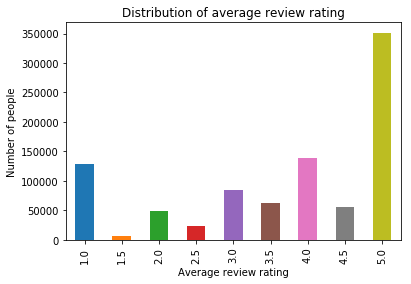

In [35]:
avg_rating_user = pd.Series(np.round(review[['stars', 'user_id']].groupby('user_id').mean().stars.values * 2) / 2)
ax = avg_rating_user.value_counts().sort_index().plot(kind = 'bar', title = 'Distribution of average review rating')

ax.set_ylabel("Number of people")
ax.set_xlabel("Average review rating")

## Most Common Business Categories

Text(0.5,0,'Business categories')

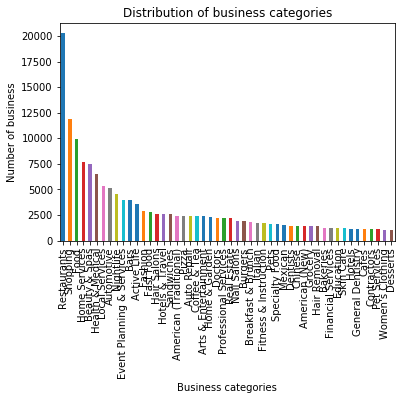

In [38]:
all_business_categories = [item for sublist in business.categories for item in sublist]
ax = pd.Series(all_business_categories).value_counts()[:50].plot(kind = 'bar', title = 'Distribution of business categories')
ax.set_ylabel("Number of business")
ax.set_xlabel("Business categories")

## Most Reviewed Business Categories

In [ ]:
x = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level = 0)
most_reviewed_places = x.apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')

In [ ]:
most_reviewed_places = x.drop(columns = ['Restaurants', 'Food', 'Nightlife']).apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')


In [ ]:
most_reviewed_places = x.drop(columns = ['Restaurants', 'Food', 'Nightlife', 'Bars']).apply(lambda x: np.asarray(x) * np.asarray(business.review_count[business.categories.apply(len) != 0]))
most_reviewed_places.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')


# Food Trends

In [ ]:
# Dropping non restaurants businesses
bus_cat_filter = business.categories.apply(lambda x: False if 'Restaurants' in x else True)
business.drop(business[bus_cat_filter].index, inplace = True)

In [ ]:
# Dropping reviews of non restaurants and non-food business
rew_busniess_filter = review.business_id.isin(list(business.business_id))
review = review[rew_busniess_filter]

In [ ]:
y = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level = 0)
y = y.replace(0, np.NaN)
ydf = pd.DataFrame(y.multiply(business['stars'], axis = 0).mean())
y_fil_index = y.multiply(business['stars'], axis = 0).count()[y.multiply(business['stars'], axis = 0).count() > 5].index

In [ ]:
# business[business.categories.apply(lambda x: True if 'Personal Assistants' in x else False)]['categories'].values

In [ ]:
y_fil_index = y.multiply(business['stars'], axis = 0).count()[y.multiply(business['stars'], axis = 0).count() > 50].index
ydf.loc[y_fil_index, 0].sort_values(ascending = False)[ :30].plot(kind = 'bar')

# FEATURE ENGINEERING

In [ ]:
# Avg restaurant rating
avg_restaurant_rating = review.groupby('business_id').mean()[['stars']]
avg_restaurant_rating.columns = ['avg_rating']
business = pd.merge(business, avg_restaurant_rating, how='inner', on=None, 
                     left_on='business_id', right_on=None,
                     left_index=False, right_index=True, sort=True,
                     suffixes=('_x', '_y'), copy=True, indicator=False,
                     validate=None)

In [ ]:
print(business.columns, business.shape)
print(review.columns, review.shape)

In [ ]:
business_categories_df = pd.get_dummies(business.categories.apply(pd.Series).stack()).sum(level=0)
business_categories_counts = business_categories_df.sum().sort_values(ascending = False)

business_categories_drop = list(business_categories_counts[business_categories_counts < 10].index.values)
business_categories_drop.append('Restaurants')
business_categories_drop.append('Food')
business_categories_df.drop(columns = business_categories_drop, inplace = True)

business.drop(columns = ['categories'], inplace = True)
business = pd.concat([business, business_categories_df], axis=1)

business = business[business[business_categories_df.columns].sum(axis = 1) != 0]
print(business.columns, business.shape)

In [ ]:
review.columns = ['business_id', 'date', 'review_id', 'review_stars', 'text', 'useful','user_id']

In [ ]:
business_categories_df.sum().sort_values(ascending = False)[:20].plot(kind = 'bar')

In [ ]:
alldf = pd.merge(business, review, how='inner', on=None, 
                     left_on='business_id', right_on='business_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('_business', '_review'), copy=True, indicator=False,
                     validate=None)
alldf = pd.merge(alldf, user, how='inner', on=None, 
                     left_on='user_id', right_on='user_id',
                     left_index=False, right_index=False, sort=True,
                     suffixes=('', '_user'), copy=True, indicator=False,
                     validate=None)

In [ ]:
for i in alldf.columns:
    print(i)

In [ ]:
business.head()

In [ ]:
user_idx = 'gFAdHnUksK22NDhvqkLunA'
 
def userCategoriesRatings(user_id, cols = business_categories_df.columns):
    person_filter = alldf.user_id == user_id
    df = alldf[person_filter]
    df = df.replace(0, np.NaN)

    #top_cat = df[cols].apply(lambda x: np.asarray(x) * np.asarray(df.review_stars.values)).mean()
    top_cat = df[cols].multiply(df.review_stars, axis = 0).mean()

    return top_cat[~(top_cat.isnull())]
    
userCategoriesRatings(user_idx)

In [ ]:
def userVisited(user_id, inverse = 0):
    if inverse == 0:
        res = review.business_id[review.user_id == user_id].unique()
    else:
        res = review.business_id[~(review.user_id == user_id)].unique()
    return res

# Most Popular Recommendations

In [ ]:
def mostPopular(user_id, city, limit = 10):
    top_picks = business[business.city == city]
    
    print('Total available options in the location : %d' % (top_picks.shape[0]))
    
    places_visited = review.business_id[review.user_id == user_id]
    
    top_picks = top_picks[~top_picks.business_id.isin(places_visited)]
    top_picks = top_picks.sort_values('avg_rating', ascending = False)
    
    return top_picks['name'][:limit].values

In [ ]:
mostPopular('JJ-aSuM4pCFPdkfoZ34q0Q', 'Toronto')

In [ ]:
alldf.columns

In [ ]:
list_col = list(business_categories_df.columns.values)
list_col.append('user_id')
user_cat_matrix = alldf.loc[:, list_col].multiply(alldf.review_stars, axis = 0).replace(0, np.NaN).groupby('user_id').mean()

In [ ]:
user_cat_matrix

# User-User Collaborative filtering:

In [ ]:
# User-User Collaborative filtering:

def findSimilarRestaurants(user_id, user_cat_matrix = user_cat_matrix, n = 10):
    
    person = np.array(user_cat_matrix.loc[user_id,])[:, np.newaxis]
    others = np.array(user_cat_matrix[user_cat_matrix.index != user_idx])
    scores = np.sum((others * person.T), axis = 1)/ (np.sum(person*2) * np.sum(others*2, axis = 1))
    
    sim_user_id = user_cat_matrix.index.values[np.argsort(-scores)[:n]]
    
    sim_visited = []
    for i in sim_user_id:
        sim_visited.extend(userVisited(i))
        
    sim_visited = pd.DataFrame(pd.Series(sim_visited).value_counts(), columns = ['Counts'])
    bus_col = ['stars', 'business_id', 'name']
    bus_col.extend(userCategoriesRatings(user_idx).index.values)
    
    suggestions = pd.merge(sim_visited, business[bus_col], how='inner', on=None, 
                     left_on=None, right_on='business_id',
                     left_index=True, right_index=False, sort=True,
                     suffixes=('_business', '_review'), copy=True, indicator=False,
                     validate=None)
    
    suggestions = suggestions[~suggestions.business_id.isin(userVisited(user_idx))]
    suggestions['user_fav_cuisine'] = suggestions[userCategoriesRatings(user_idx).index.values].sum(axis = 1)

    return suggestions.sort_values(by = ['Counts','stars', 'user_fav_cuisine'], ascending = False)
    
findSimilarRestaurants(user_idx, user_cat_matrix)

# Baseline Prediction

http://cs229.stanford.edu/proj2013/SawantPai-YelpFoodRecommendationSystem.pdf

In [ ]:
mu = np.mean(review.review_stars)
mean_user_ratings = review[['user_id', 'review_stars']].groupby('user_id').mean()
mean_business_ratings = review[['business_id', 'review_stars']].groupby('business_id').mean()


In [ ]:
def baseline_rating(user_id, business_id, mu = mu):
    bu = mean_user_ratings.loc[user_id, 'review_stars']
    bf = mean_business_ratings.loc[business_id, 'review_stars'] 
    
    bu -= mu
    bf -= mu
    
    return mu + bf + bu

baseline_rating('---udAKDsn0yQXmzbWQNSw','--I7YYLada0tSLkORTHb5Q')

In [ ]:
from sklearn.model_selection import train_test_split

filtter = ['review_id', '_review_stars', 'business_id', 'text', 'useful', 'address', 'city', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'state', 'user_id', 'date']

train_data, test_data, train_label, test_label = train_test_split(alldf.drop(columns = filtter), alldf['_review_stars'])



In [ ]:
train_data.dtypes

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(train_data, train_label) 

In [ ]:
pred = clf.predict(test_data)

In [ ]:


#alldf[alldf.user_id == user_idx][business_categories_df.columns].mul(alldf.review_stars[alldf.user_id == user_idx].astype(int), axis = 1).mean()
#alldf.review_stars[alldf.user_id == user_idx]
#alldf[alldf.user_id == user_idx][business_categories_df.columns].mul(, axis = 1)

#alldf[alldf.user_id == user_idx][business_categories_df.columns].apply(lambda x: np.asarray(x) * np.asarray(alldf.review_stars[alldf.user_id == user_idx]))
#alldf[alldf.user_id == user_idx][business_categories_df.columns].apply(lambda x: np.asarray(x) * np.asarray(alldf.review_stars[alldf.user_id == user_idx]))
